In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# use folim lib to plot geographic map
import folium

In [128]:
# import historical fire dataset
data_pass = pd.read_csv('.\datasets\H_FIRE_PNT.CSV',encoding='ISO-8859-1')
# import current year (2018) fire dataset
data_curr = pd.read_csv('.\datasets\C_FIRE_PNT.CSV', encoding='ISO-8859-1')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
data_pass.shape[0], data_curr.shape[0]

(177320, 1889)

In [4]:
# merge pass and current data
data_all = pd.concat([data_pass, data_curr], axis=0, join='inner')
# drop irrelevant columns
data_all.drop(['SHAPE','X','Y'], axis=1, inplace=True)
data_all.FIRE_TYPE.unique()
# remove non-fire data
data_all = data_all[data_all['FIRE_TYPE']=='Fire']
data_all = data_all.reset_index()

In [5]:
# only interested fires since 1980
fires_1980_2017 = data_all[(data_all['FIRE_YEAR']>1979) & (data_all['FIRE_YEAR']<2018)]
fires_1980_2017.shape[0]

79986

In [111]:
# number and percentage of fires caused by human vs by nature (1980-2017)
number_fires = fires_1980_2017.groupby(['FIRE_YEAR','FIRE_CAUSE']).size()
number_fires = number_fires.unstack()
number_fires['human_perc'] = 100*number_fires['Person']/(number_fires['Lightning']+number_fires['Person'])

In [131]:
# compare total number of fires before and after 2000
num_f1 = fires_1980_2017[fires_1980_2017['FIRE_YEAR']<2001].shape[0]
num_f2 = fires_1980_2017[fires_1980_2017['FIRE_YEAR']>2000].shape[0]
num_f1, num_f2, num_f2/num_f1

(50249, 29737, 0.5917928714999303)

In [112]:
# only show 2 decimals
pd.options.display.float_format = '{:.2f}'.format
# some stats of number of fires
number_fires.describe()

FIRE_CAUSE,Lightning,Person,human_perc
count,38.00,38.00,38.00
mean,1152.24,952.50,47.70
std,650.58,362.77,13.15
min,209.00,444.00,28.45
25%,666.25,667.25,38.49
50%,930.00,898.00,43.87
75%,1668.75,1206.50,58.52
max,2888.00,2039.00,76.66


In [113]:
pp = number_fires['Person'].sum()/(number_fires['Lightning'].sum()+number_fires['Person'].sum())
print('% (by number) burned by human-caused fires: {:.2f}%'.format(100*pp))

% (by number) burned by human-caused fires: 45.26%


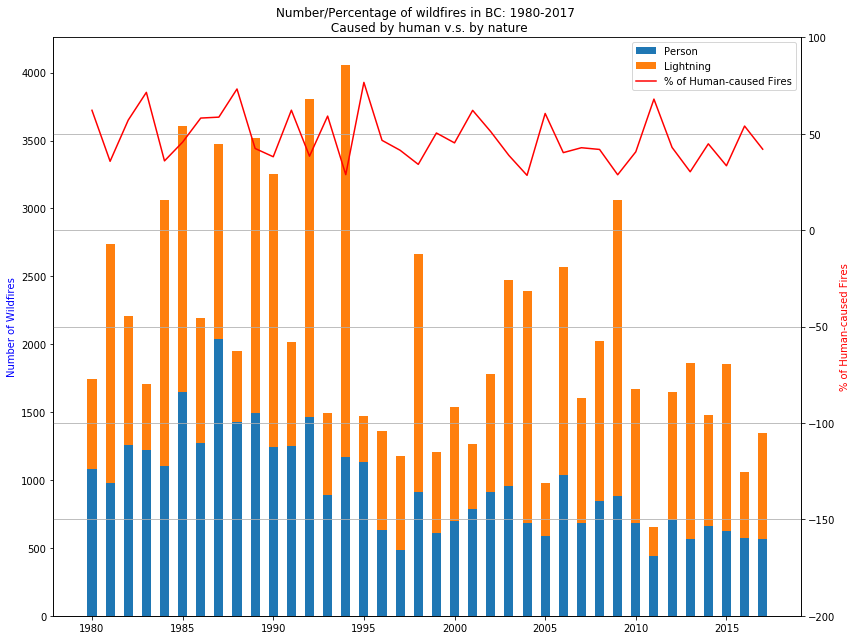

In [118]:
bar_width = 0.5
# plot number of fires
fig, ax1 = plt.subplots(figsize=(12,9))
p1 = ax1.bar(number_fires.index, number_fires['Person'], bar_width)
p2 = ax1.bar(number_fires.index, number_fires['Lightning'], bar_width,
            bottom=number_fires['Person'])
ax1.set_ylabel('Number of Wildfires', color='b')
ax2 = ax1.twinx()
p3 = ax2.plot(number_fires.index, number_fires['human_perc'], c='r')
ax2.set_ylabel('% of Human-caused Fires', color='r')
ax2.set_ylim(-200,100)
plt.title('Number/Percentage of wildfires in BC: 1980-2017 \n Caused by human v.s. by nature')
plt.grid(axis='y')
plt.legend((p1[0], p2[0], p3[0]), ('Person', 'Lightning', '% of Human-caused Fires'))
fig.tight_layout()
plt.show()
# reset plotting parameters
plt.gcf().clear() 

In [120]:
# size of fires caused by human vs by nature (1980-2017)
size_fires = fires_1980_2017.groupby(['FIRE_YEAR','FIRE_CAUSE'])['SIZE_HA'].sum(axis=0)
size_fires = size_fires.unstack()
size_fires['human_perc']=100*size_fires['Person']/(size_fires['Lightning']+size_fires['Person'])

In [132]:
# compare areas burned of fires before and after 2000
size_f1 = fires_1980_2017[fires_1980_2017['FIRE_YEAR']<2001]['SIZE_HA'].sum(axis=0)
size_f2 = fires_1980_2017[fires_1980_2017['FIRE_YEAR']>2000]['SIZE_HA'].sum(axis=0)
size_f1, size_f2, size_f2/size_f1

(1353446.223, 3404291.6810000003, 2.5152766494513319)

In [121]:
# some stats of size of fires
size_fires.describe()

FIRE_CAUSE,Lightning,Person,human_perc
count,38.00,38.00,38.00
mean,94854.26,30348.38,41.68
std,180959.60,52722.87,28.68
min,326.60,1224.16,1.09
25%,6803.40,6558.32,18.95
50%,16067.98,11202.52,41.22
75%,93437.35,26398.07,65.27
max,991054.37,238086.11,99.34


In [122]:
pp = size_fires['Person'].sum()/(size_fires['Lightning'].sum()+size_fires['Person'].sum())
print('% (by hectares) burned by human-caused fires: {:.2f}%'.format(100*pp))

% (by hectares) burned by human-caused fires: 24.24%


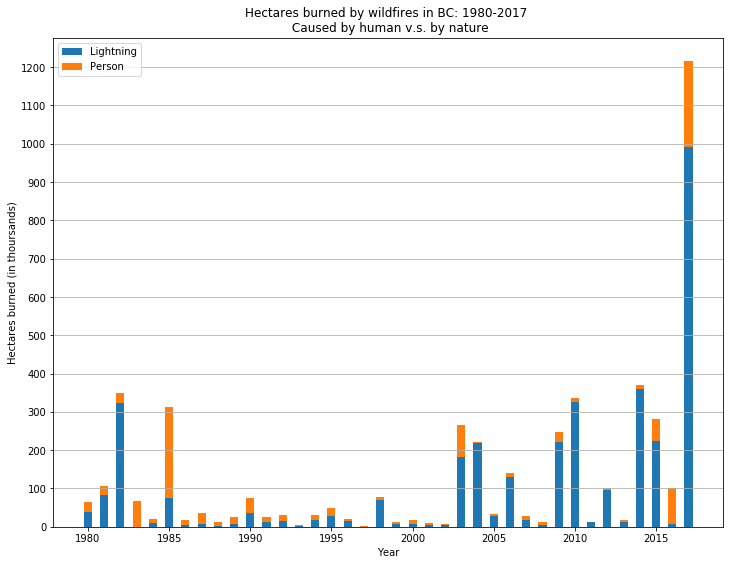

In [123]:
# plot size of fires
plt.figure(figsize=(12,9))
p1 = plt.bar(size_fires.index, size_fires['Lightning'], bar_width)
p2 = plt.bar(size_fires.index, size_fires['Person'], bar_width,
             bottom=size_fires['Lightning'])
plt.legend((p1[0], p2[0]), ('Lightning', 'Person'))
plt.xlabel('Year')
plt.ylabel('Hectares burned (in thoursands)')
plt.yticks(np.arange(0,1300000,100000), np.arange(0, 1300, 100))
plt.title('Hectares burned by wildfires in BC: 1980-2017 \n Caused by human v.s. by nature')
plt.grid(axis='y')
plt.show()
# reset plotting parameters
plt.gcf().clear() 

In [14]:
# large fires - over 200 hectares (by Canadian Council of Forest Ministers)
# https://www.ccfm.org/pdf/2%20Fire%20Load%20Trends.pdf
fires_large = fires_1980_2017[fires_1980_2017['SIZE_HA'] > 200.]
pp1 = fires_large.shape[0]/fires_1980_2017.shape[0]
pp2 = fires_large['SIZE_HA'].sum()/fires_1980_2017['SIZE_HA'].sum()
print('{} large fires ({:.2f}% of all fires) accounts for {:.2f}% of all burned areas.'.format(fires_large.shape[0], 100*pp1, 100*pp2))

1141 large fires (1.43% of all fires) accounts for 95.23% of all burned areas.


In [108]:
# top 20 fire by size (1980-2017)
fires_top20 = fires_1980_2017.sort_values('SIZE_HA', axis=0, ascending=False).iloc[0:20,:]
pp = 100*fires_top20['SIZE_HA'].sum()/fires_1980_2017['SIZE_HA'].sum()
print('Top 20 fires account for {:.2f}% of all burned areas.'.format(pp))

Top 20 fires account for 39.72% of all burned areas.


In [133]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':fires_top20['LATITUDE'],
   'lon':fires_top20['LONGITUDE'],
    'fire_size':fires_top20['SIZE_HA'],
    'fire_year':fires_top20['FIRE_YEAR'],
    'fire_cause':fires_top20['FIRE_CAUSE'],
    'location':fires_top20['GEO_DESC'],
    'radius':np.sqrt(fires_top20['SIZE_HA']/1000.)
})
 
# Make an empty map
top20_fire_map = folium.Map(location=[53.7267,-127.3273], tiles="Mapbox Bright", zoom_start=5)
# I can add marker one by one on the map
for i in range(0,len(data)):
    popup_msg = 'Fire size: ' + str(data.iloc[i]['fire_size']) + ' ha<br>' 
    popup_msg += 'Fire year: ' + str(data.iloc[i]['fire_year']) + '<br>' 
    popup_msg += 'Cause: '+ data.iloc[i]['fire_cause']  + '<br>' 
    popup_msg += 'Location: ' + str(data.iloc[i]['location'])
    folium.CircleMarker([data.iloc[i]['lat'],data.iloc[i]['lon']], 
                        radius=data.iloc[i]['radius'], 
                        color='red', 
                        fill=True,
                        fill_color='crimson',
                        popup=popup_msg).add_to(top20_fire_map)

 
top20_fire_map


In [124]:
# 2018 fires (current year dataset last updated on May 16 2018)
fires_2018 = data_all[data_all['FIRE_YEAR']>2017]
fires_2018.shape[0]

1889

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



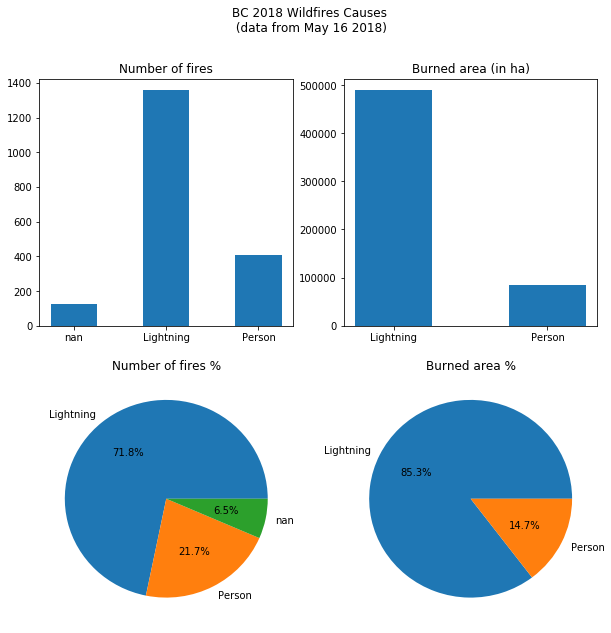

In [125]:
num_counts = fires_2018['FIRE_CAUSE'].value_counts(dropna=False)
size_counts = fires_2018.groupby(['FIRE_CAUSE'])['SIZE_HA'].sum()
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].bar(num_counts.index, num_counts.values, bar_width)
axs[0,0].set_title('Number of fires')
axs[0,1].bar(size_counts.index, size_counts.values, bar_width)
axs[0,1].set_title('Burned area (in ha)')
axs[1,0].pie(num_counts.values, labels=num_counts.index, autopct='%1.1f%%')
axs[1,0].set_title('Number of fires %')
axs[1,1].pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%')
axs[1,1].set_title('Burned area %')
fig.suptitle('BC 2018 Wildfires Causes\n (data from May 16 2018)')
fig.show()